In [1]:
# Import packages
import plotnine as p9
import numpy as np
import statistics
from scipy import stats
from scipy.stats import chi2_contingency
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels as sm
import seaborn as sns
from sklearn import linear_model
#from smf import logit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
#%matlpotlib inline

In [2]:
#import the file
df = pd.read_csv('churn_clean.csv',dtype={'locationid':np.int64})

In [3]:
#print first 100 records
df.head(100)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,W877056,728fccac-151c-4743-8c4a-ebf5af17ec9d,2d0a8b770314914a21b0714fefb68925,Dallas,TX,Dallas,75212,32.78137,-96.87917,...,245.145743,1158.913690,5,5,4,5,1,5,5,4
96,97,M478246,fb749668-dbf8-448a-bc59-5bdba08f7e0b,e04663ac6cc68fac084cd2b394ca7cb8,Claytonville,IL,Iroquois,60926,40.57234,-87.80962,...,124.978080,529.407330,4,4,4,3,2,4,3,4
97,98,N417817,832e769e-3b90-47cc-8f70-12e77fbd52a2,4886325be93630732220fb84b427c7cd,Beaverville,IL,Iroquois,60912,40.97003,-87.59935,...,187.484705,1956.733700,3,2,2,4,3,2,3,2
98,99,R180138,7def992e-acd6-4b3e-9d01-68812f5fd2ff,9f2b4718c758e51e0b16b99cc7915687,Fayetteville,NC,Cumberland,28301,35.07431,-78.88358,...,162.500692,2056.386979,5,4,4,3,4,4,5,5


In [4]:
#check for columns with missing values
missingvalues = df.isna().sum()

In [5]:
#print the summary of columns with missing values
print(missingvalues)

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
#drop columns irrelevant to analysis
NewDf = df.drop(columns=['Marital','Job','CaseOrder', 'Customer_id', 'Interaction','UID','City','State','County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Techie', 'Port_modem','Tablet', 
'Phone','Multiple','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','InternetService','StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 
 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8','Tenure'])

In [7]:
#summary statistics
round(NewDf.describe(),2)

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,2.09,53.08,39806.93,10.00,12.02,0.99,0.40,172.62,3392.34
std,2.15,20.70,28199.92,2.98,3.03,0.99,0.64,42.94,2185.29
min,0.00,18.00,348.67,0.10,1.00,0.00,0.00,79.98,155.51
25%,0.00,35.00,19224.72,8.02,10.00,0.00,0.00,139.98,1236.47
50%,1.00,53.00,33170.60,10.02,12.00,1.00,0.00,167.48,3279.54
75%,3.00,71.00,53246.17,11.97,14.00,2.00,1.00,200.73,5586.14
max,10.00,89.00,258900.70,21.21,23.00,7.00,6.00,290.16,7158.98


In [8]:
#check the datatypes of each columns
NewDf.dtypes

Children                  int64
Age                       int64
Income                  float64
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [9]:
#create dummies for certain variables
NewDf['gender_dummy'] = [1 if v == 'Female' else 0 for v in NewDf['Gender']]
NewDf['churn_dummy'] = [1 if v == 'Yes' else 0 for v in NewDf['Churn']]
NewDf = NewDf.drop(columns=['Gender','Churn'])
NewDf.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,MonthlyCharge,Bandwidth_GB_Year,gender_dummy,churn_dummy
0,0,68,28561.99,7.978323,10,0,1,172.455519,904.536110,0,0
1,1,27,21704.77,11.699080,12,0,1,242.632554,800.982766,1,1
2,4,50,9609.57,10.752800,9,0,1,159.947583,2054.706961,1,0
3,1,48,18925.23,14.913540,15,2,0,119.956840,2164.579412,0,0
4,0,83,40074.19,8.147417,16,2,1,149.948316,271.493436,0,1


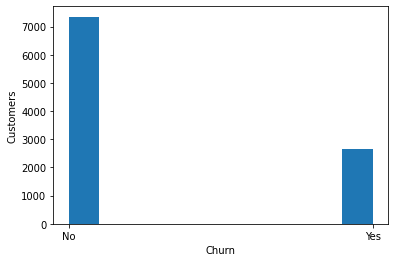

In [10]:
#create univariate visualizations
plt.hist(df['Churn'])
plt.xlabel("Churn")
plt.ylabel("Customers")
plt.show()


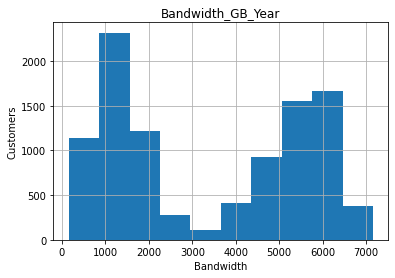

In [11]:
NewDf.hist(column='Bandwidth_GB_Year')
plt.xlabel("Bandwidth")
plt.ylabel("Customers")
plt.show()

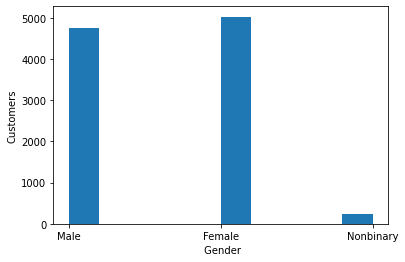

In [12]:
plt.hist(df['Gender'])
plt.xlabel(" Gender")
plt.ylabel("Customers")
plt.show()


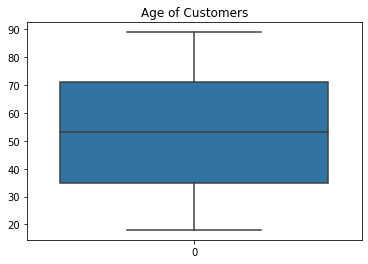

In [13]:
sns.boxplot(data=NewDf.Age)
plt.title('Age of Customers')
plt.show()

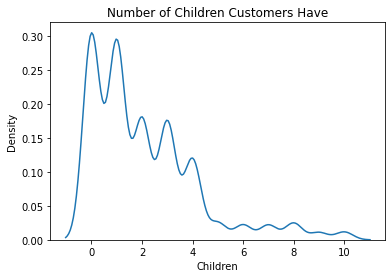

In [14]:
sns.kdeplot(NewDf['Children'])
plt.title("Number of Children Customers Have")
plt.show()

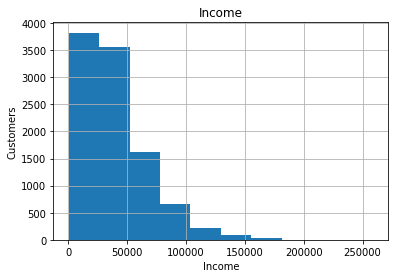

In [15]:
NewDf.hist(column='Income')
plt.xlabel("Income")
plt.ylabel("Customers")
plt.show()

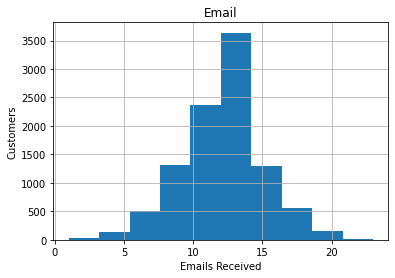

In [16]:
NewDf.hist(column='Email')
plt.xlabel("Emails Received")
plt.ylabel("Customers")
plt.show()

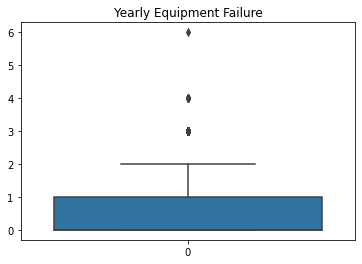

In [17]:
sns.boxplot(data=NewDf.Yearly_equip_failure)
plt.title('Yearly Equipment Failure')
plt.show()


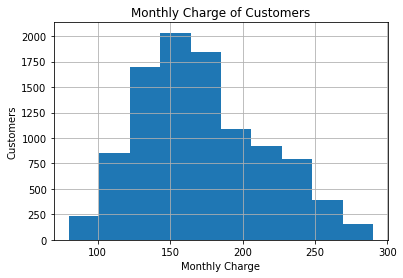

In [18]:
NewDf.hist(column='MonthlyCharge')
plt.title('Monthly Charge of Customers')
plt.xlabel("Monthly Charge")
plt.ylabel("Customers")
plt.show()

<AxesSubplot:title={'center':'Churn vs Outage Per Week (Seconds)'}, xlabel='Outage_sec_perweek', ylabel='churn_dummy'>

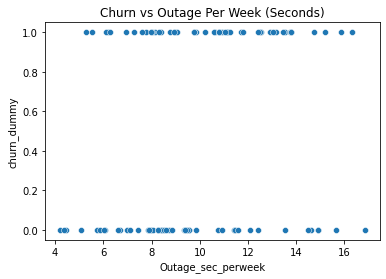

In [19]:
#bivariate visualization of predictor variables and target variable: Churn 
plt.title('Churn vs Outage Per Week (Seconds)')
sns.scatterplot(data = NewDf, x = NewDf.Outage_sec_perweek[0:100], y = NewDf.churn_dummy[0:100])


<AxesSubplot:title={'center':'Churn vs Income'}, xlabel='Income', ylabel='churn_dummy'>

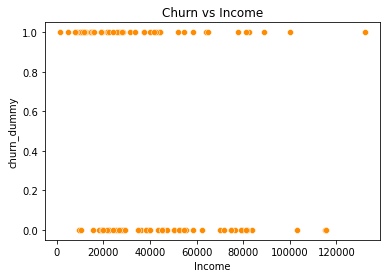

In [20]:
plt.title('Churn vs Income')
sns.scatterplot(data = NewDf, x = NewDf.Income[0:100], y = NewDf.churn_dummy[0:100], color='darkorange')


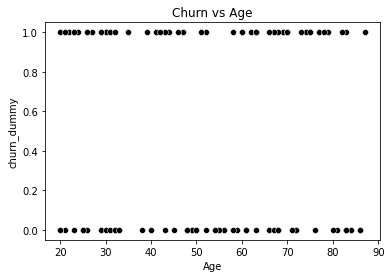

In [21]:

plt.title('Churn vs Age')
sns.scatterplot(data = NewDf, x = NewDf.Age[0:100], y = NewDf.churn_dummy[0:100], color='black')
plt.show()

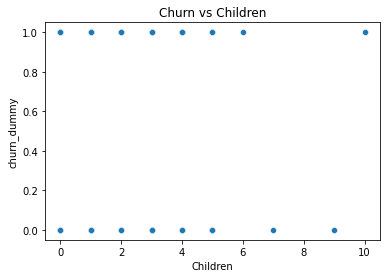

In [22]:

plt.title('Churn vs Children')
sns.scatterplot(data = NewDf, x = NewDf.Children[0:100], y = NewDf.churn_dummy[0:100])
plt.show()

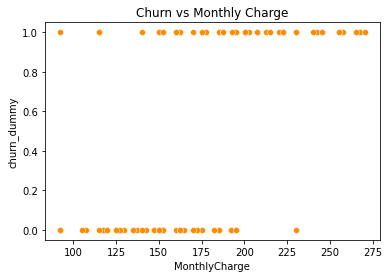

In [23]:

plt.title('Churn vs Monthly Charge')
sns.scatterplot(data = NewDf, x=NewDf.MonthlyCharge[0:100], y=NewDf.churn_dummy[0:100], color='darkorange')
plt.show()

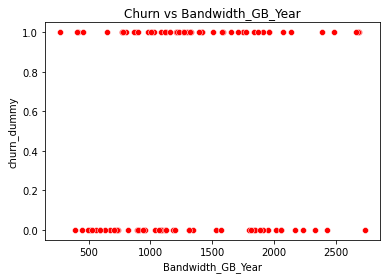

In [24]:
plt.title('Churn vs Bandwidth_GB_Year')
sns.scatterplot(data=NewDf, x = NewDf.Bandwidth_GB_Year[0:100], y = NewDf.churn_dummy[0:100],color='red')
plt.show()

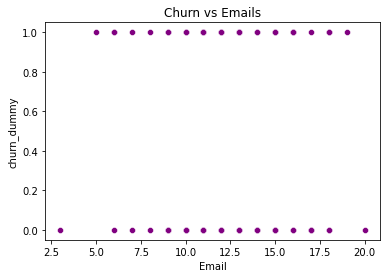

In [25]:
plt.title('Churn vs Emails')
sns.scatterplot(data = NewDf, x=NewDf.Email[0:100], y=NewDf.churn_dummy[0:100], color='purple')
plt.show()

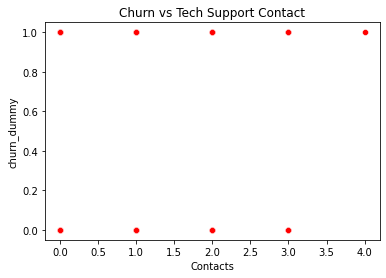

In [26]:
plt.title('Churn vs Tech Support Contact')
sns.scatterplot(data = NewDf, x=NewDf.Contacts[0:100], y=NewDf.churn_dummy[0:100], color='red')
plt.show()

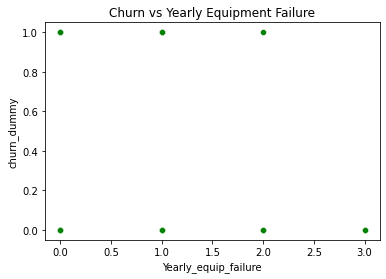

In [27]:
plt.title('Churn vs Yearly Equipment Failure')
sns.scatterplot(data = NewDf, x=NewDf.Yearly_equip_failure[0:100], y=NewDf.churn_dummy[0:100], color='green')
plt.show()

In [28]:
NewDf.to_csv ('NewDf_Log.csv', index = False, header=True)
print(NewDf)

      Children  Age    Income  Outage_sec_perweek  Email  Contacts  \
0            0   68  28561.99            7.978323     10         0   
1            1   27  21704.77           11.699080     12         0   
2            4   50   9609.57           10.752800      9         0   
3            1   48  18925.23           14.913540     15         2   
4            0   83  40074.19            8.147417     16         2   
...        ...  ...       ...                 ...    ...       ...   
9995         3   23  55723.74            9.415935     12         2   
9996         4   48  34129.34            6.740547     15         2   
9997         1   48  45983.43            6.590911     10         0   
9998         1   39  16667.58           12.071910     14         1   
9999         1   28   9020.92           11.754720     17         1   

      Yearly_equip_failure  MonthlyCharge  Bandwidth_GB_Year  gender_dummy  \
0                        1     172.455519         904.536110             0   
1  

In [29]:
#initial multiple logistic regression model
import statsmodels.api as sm
import statsmodels.formula.api as smf

X = NewDf[['gender_dummy','Outage_sec_perweek','MonthlyCharge','Bandwidth_GB_Year','Email','Contacts',
           'Yearly_equip_failure','Income','Age','Children']]
y = NewDf['churn_dummy']
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
fitted_model = logistic_regression.fit()
fitted_model.summary()

Optimization terminated successfully.
         Current function value: 0.357039
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.3825
Time:                        12:50:49   Log-Likelihood:                -3570.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.9169      0.236    -20.837      0.000      -5.379      -4.454
gender_dummy            -0.1933      0.059     -3.257      0.001      -0.310      -0.077
Outage_sec_perweek      -0.0027      0.010     -0.267      0.790      -0.022       0.017
MonthlyCharge            0.0342      0.001     38.695      0.000       0.032       0.036
Bandwidth_GB_Year       -0.0008   1.97e-05    -41.492      0.000      -0.001      -0.001
Email                    0.0023      0.010      0.232      0.817      -0.017       0.022
Contacts                 0.0291      0.030      0.976      0.329      -0.029       0.088
Yearly_equip_failure    -0.0417      0.047     -0.885      0.376      -0.134       0.051
Income                9.126e-07   1.05e-06      0.865      0.387   -1.15e-06    2.98e-06
Age                     -0.0012      0.001     -0.858      0.391      -0.004       0.002
Children                 0.0174      0.014      1.242      0.214      -0.010       0.045
========================================================================================
"""

In [30]:
#reduced multiple logistic regression model
X = NewDf[['gender_dummy','MonthlyCharge','Bandwidth_GB_Year']]
y = NewDf['churn_dummy']

import statsmodels.api as sm
import statsmodels.formula.api as smf
Xc = sm.add_constant(X)
logistic_regression = sm.Logit(y,Xc)
new_model = logistic_regression.fit()
new_model.summary()

Optimization terminated successfully.
         Current function value: 0.357282
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            churn_dummy   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Jun 2022   Pseudo R-squ.:                  0.3821
Time:                        12:50:49   Log-Likelihood:                -3572.8
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -4.8958      0.147    -33.228      0.000      -5.185      -4.607
gender_dummy         -0.1918      0.059     -3.236      0.001      -0.308      -0.076
MonthlyCharge         0.0342      0.001     38.701      0.000       0.032       0.036
Bandwidth_GB_Year    -0.0008   1.97e-05    -41.529      0.000      -0.001      -0.001
=====================================================================================
"""

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

#Training the Logistic Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#Predicting the Test Set Result
y_pred = classifier.predict(X_test)

#create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2201
           1       0.70      0.59      0.64       799

    accuracy                           0.82      3000
   macro avg       0.78      0.75      0.76      3000
weighted avg       0.82      0.82      0.82      3000



<AxesSubplot:>

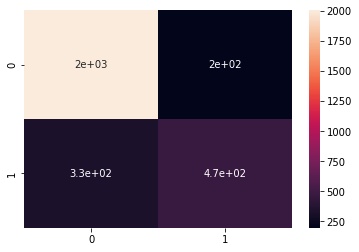

In [32]:
#Create Confusion Matrix
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_pred)

sns.heatmap(conmat, annot=True)

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2004,  197],
       [ 331,  468]])

In [38]:
print ('odd ratios of coefficients: %s' % np.exp(new_model.params))

odd ratios of coefficients: const                0.007478
gender_dummy         0.825508
MonthlyCharge        1.034770
Bandwidth_GB_Year    0.999184
dtype: float64


AttributeError: 'LogitResults' object has no attribute 'roc_auc_score'